# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Gruber Thomas

Datum: 20.11.2023

Gruppe: 09

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie genau lässt sich eine Wärmekapazität mit zwei einfachen Temperatursensoren und zwei Wasserbechern bestimmen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/heat_capacity" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
#path to the file
path = 'data/heat_capacity_data/heat_capacity_data.h5'


In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py as h5
with h5.File(path) as i:
    # save group1 in example.h5 to variable g.
    g = i["RawData"]
    # read group1 attribute authors.
    timestamp_2 = i["RawData/1ee879eb-49a9-6636-ae3d-ef2e9204f1c2/timestamp"]
    temperature_2 = i["RawData/1ee879eb-49a9-6636-ae3d-ef2e9204f1c2/temperature"]
    timestamp_1 = i["RawData/1ee879e0-010f-64d4-a045-f88d645a496a/timestamp"]
    temperature_1 = i["RawData/1ee879e0-010f-64d4-a045-f88d645a496a/temperature"]
    print(timestamp_1[10])
    #converting to arrays
    time_stamp_1=np.array(timestamp_1)
    temperature__1=np.array(temperature_1)
    time_stamp_2=np.array(timestamp_2)
    temperature__2=np.array(temperature_2)
# DONE #

16.85667395591736


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


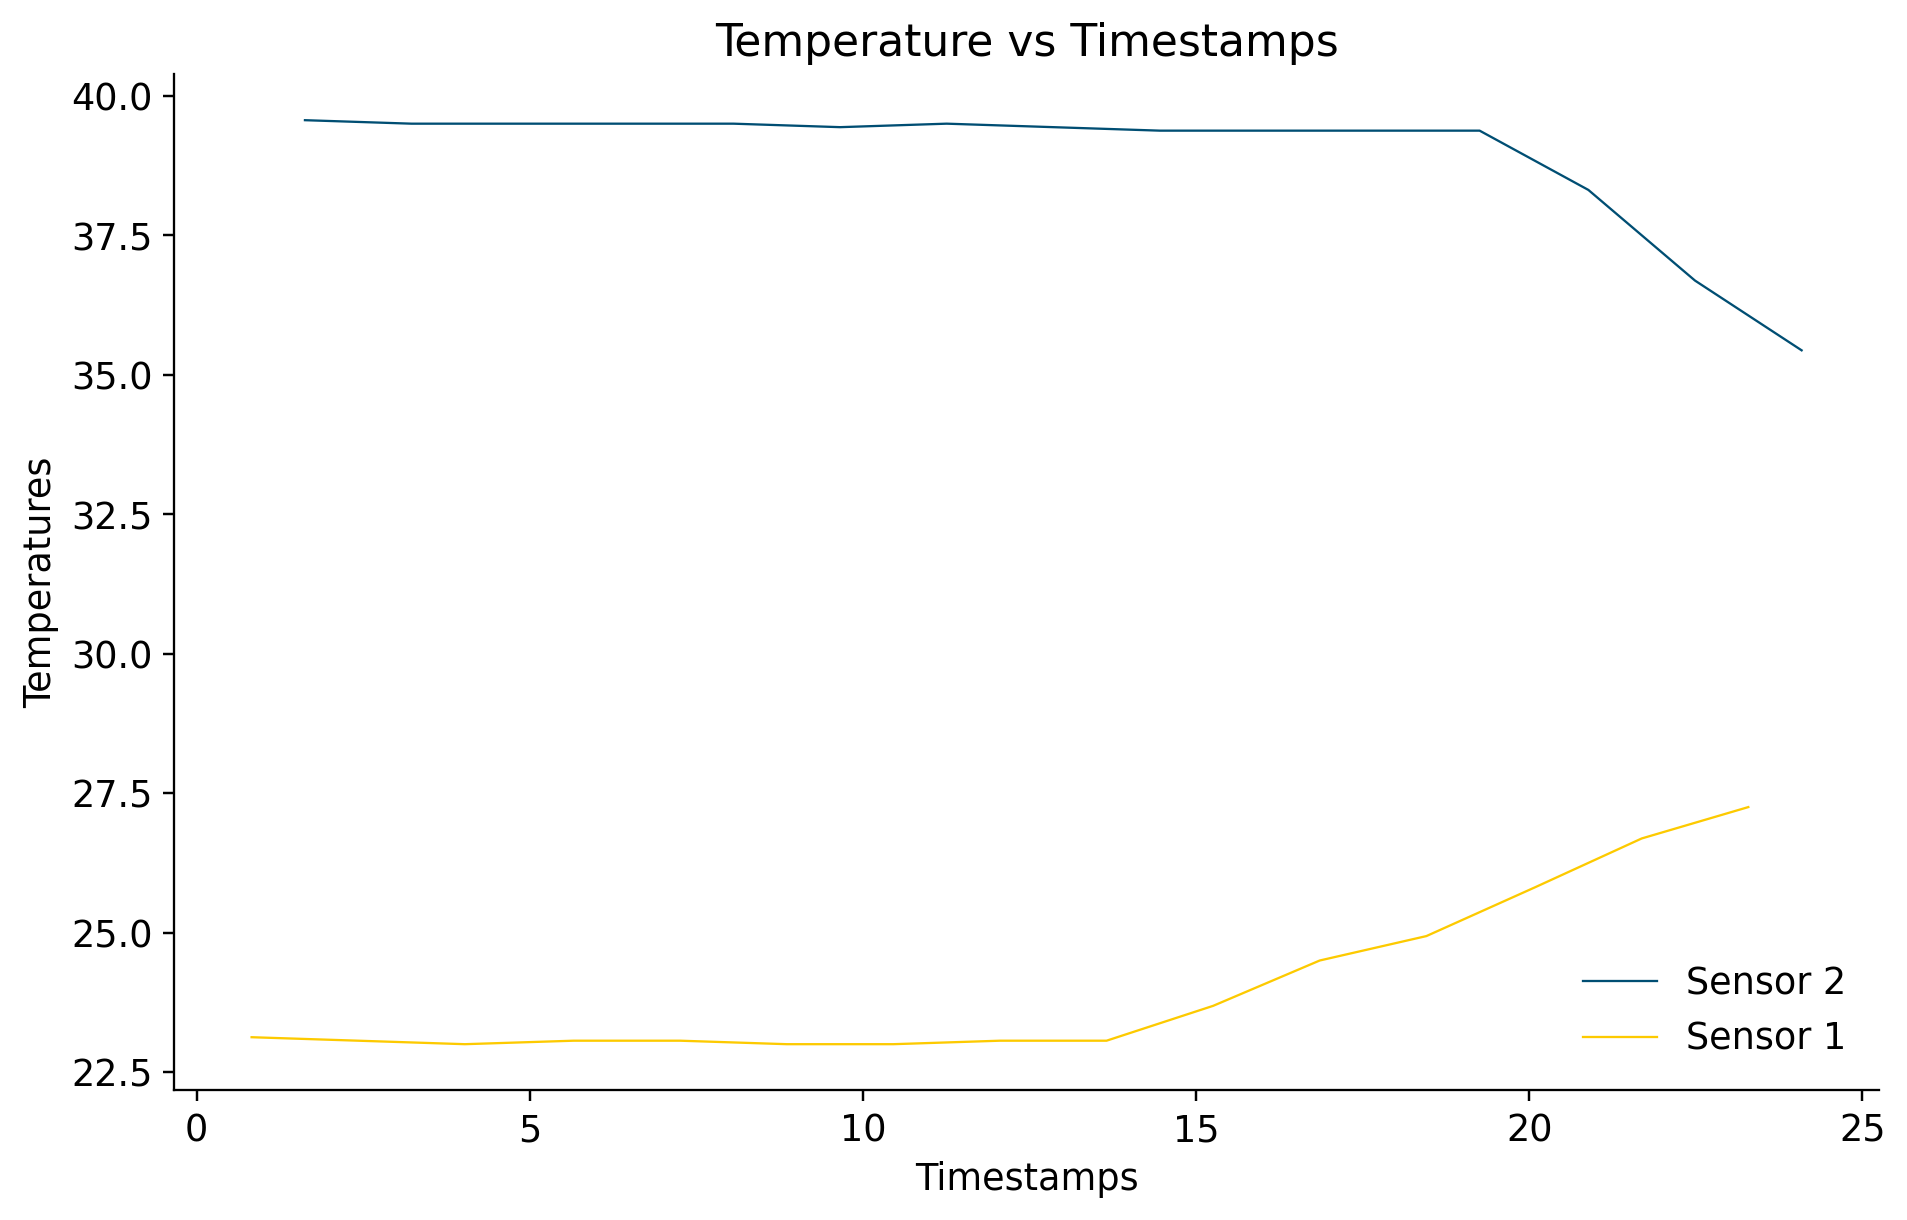

In [5]:
# TODO: Use the temperature and time data for plotting

import h5py
        # Open the HDF5 file in read mode
# Plotting both of the graphs
plt.figure(figsize=(10, 6))
plt.plot(time_stamp_2, temperature__2,label='Sensor 2')
plt.plot(time_stamp_1, temperature__1,label='Sensor 1')
plt.xlabel('Timestamps')
plt.ylabel('Temperatures')
plt.title('Temperature vs Timestamps')
plt.legend()
plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [6]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
metadata_probe = m_json.get_json_entry("/home/pi/calorimetry_home/data/heat_capacity_data", "1ee879db-f108-60b0-8dd3-516d8a5edd1a", ["probe"])
print(metadata_probe)
mass_cold_water = 0.100
mass_hot_water = 0.100


# DONE #

{'mass_cup_cold': '100g', 'mass_cup_warm': '100g'}


#### (iV) Anfangs- und Endwert der Temperatur

In [7]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T2=temperature__2[6]
T1=temperature__1[6]
TM=(temperature__1[14]+temperature__2[14])/2
print(TM)
print(T1)
print(T2)

# DONE #

31.34375
23.0
39.5


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [8]:
# TODO: Calculate heat capacity of the calorimeter
C = mass_hot_water*water_heat_capa*(T2-TM)/(TM-T1)-mass_cold_water 

# DONE #

#### (Vi) Ergebnis

In [9]:
# TODO: Print result

print(C)
# DONE #

0.3086067415730337


## Diskussion

Recherche hat ergeben, dass der errechnete Wert realistisch ist. Man kann also mit diesen Mitteln die Wärmekapazität ermitteln.

Nach Recherche zeigt sich, dass dies ein durchaus realistischer Wert für die Wärmekapazität vom Behältnis ist. Es ist also möglich mit solch einfachen Mitteln diese herauszufinden.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [10]:
Der Versuch an sich war interessant. 

SyntaxError: invalid syntax (2978119394.py, line 1)